# Heading & intro

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Import, load, modify the dataset:

In [9]:
# Import & load the dataset
topcover_data = pd.read_excel("topcover_pilot.xlsx", engine='openpyxl')

# Save as dataframe
topcover_data = pd.DataFrame(topcover_data)

# Check the dataset
print(f"- The Top Cover dataset has {topcover_data.shape[0]} rows and {topcover_data.shape[1]} columns.")
display(topcover_data.head(5))

- The Top Cover dataset has 1094 rows and 12 columns.


,Pno,Amount,Gender,RG,Cover,SurrVal,Offer/APE,PercCover,CurrAge,Fee_claimed,Take-up ind,Mngt_act
0,1,6444,M,4,48024,0,1.5,0.134183,71.250000,0,0,BCD
1,2,9649,F,7,1000000,0,1.3,0.009649,60.916667,0,0,PIN
2,3,8688,M,8,800001,2250,1.1,0.010860,63.416667,0,0,PIN
3,4,7483,F,4,21713,0,4.7,0.344632,82.916667,0,0,BCD
4,5,8115,M,8,526919,0,1.3,0.015401,60.000000,0,0,BCD


Ensure correct data types:

In [10]:
# Identify columns that contain the text "ind" or "_cd" in their names
columns_to_convert = ['Pno', 'Gender', 'RG', 'Fee_claimed', 'Take-up ind', 'Mngt_act']    

# Technically Pno must also be of type object!

# Convert the data type of these columns to object
topcover_data[columns_to_convert] = topcover_data[columns_to_convert].astype('object')

# EDA - Basic statistics:

In [11]:
stats_results = [] # empty storage
df = topcover_data # easier to save as "df"

########################### Loop through each column 
for col in df.columns:
    
    # values not dependent on the data type
    data_type = df[col].dtype                          # Data type of the column
    distinct_count = df[col].nunique()                 # Number of distinct values
    null_percentage = round(df[col].isnull().mean() * 100, 2)   # Percentage of null values
    na_percentage = round(df[col].isna().mean() * 100, 2) # Percentage of NA values
    # non_null_count = df[col].notnull().sum()           # Number of non-null entries
       

    # Calculate mean, max, etc only if the column is numeric!
    if pd.api.types.is_numeric_dtype(df[col]):
        mean_val = round(df[col].mean(), 2)
        med_val = round(df[col].median(), 2)
        min_val = round(df[col].min(), 2)
        max_val = round(df[col].max(), 2)
        std_dev = round(df[col].std(), 2)
        mode_val = round(df[col].mode()[0], 2) # zero is just in case there is more than one value
        perc_25 = round(df[col].quantile(0.25), 2)
        perc_75 = round(df[col].quantile(0.25), 2)

    else:
        mean_val = med_val = min_val = max_val =  std_dev = mode_val = perc_25 = perc_75 = None # return NaN


    # Get an example entry that is not null
    example_entry = df[col].dropna().iloc[0] if df[col].notna().sum() > 0 else None


    # Append the results for the current column as a dictionary
    stats_results.append({
        'Column': col,
        'Data Type': data_type,
        'Distinct Count': distinct_count,
        'Null Percentage': null_percentage,  
        'NA Percentage': na_percentage,      
        # '(n) Non-null Count': non_null_count,
        'Mean': mean_val,
        'Median': med_val,
        'Min': min_val,
        'Max': max_val,
        'Std Deviation': std_dev,   
        'Mode': mode_val,
        'Quartile 25% ': perc_25,
        'Quartile 75% ': perc_75,
        'Example entry': example_entry 
    })

# Convert the results list to a DataFrame for better readability
stats_results_df = pd.DataFrame(stats_results) 
display(stats_results_df)


,Column,Data Type,Distinct Count,Null Percentage,NA Percentage,Mean,Median,Min,Max,Std Deviation,Mode,Quartile 25%,Quartile 75%,Example entry
0,Pno,object,1094,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Amount,int64,1085,0.00,0.00,67589.29,32839.00,6444.00,1821200.00,125572.37,13402.00,22170.50,22170.50,6444
2,Gender,object,2,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M
3,RG,object,7,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,Cover,int64,708,0.00,0.00,629245.47,300000.00,21713.00,18868483.00,1166830.96,200000.00,150000.00,150000.00,48024
5,SurrVal,int64,430,0.00,0.00,7054.13,0.00,0.00,615611.00,27139.88,0.00,0.00,0.00,0
6,Offer/APE,float64,235,0.00,0.00,10.51,9.65,1.00,45.10,6.05,9.30,5.80,5.80,1.5
7,PercCover,float64,1093,0.00,0.00,0.15,0.13,0.01,0.54,0.10,0.13,0.08,0.08,0.134183
8,CurrAge,float64,383,0.00,0.00,70.24,69.92,42.33,92.58,8.21,68.58,65.00,65.00,71.25
9,Fee_claimed,object,2,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# Change the data 

In [12]:
# Mng NA = UR

# Imputation of some 0's and outliers


# EDA - Visualization:

## 1. Box-and-whisker plots

c:\Users\E1005280\OneDrive - Sanlam Life Insurance Limited\DCS\Training\data-academy\.venv\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


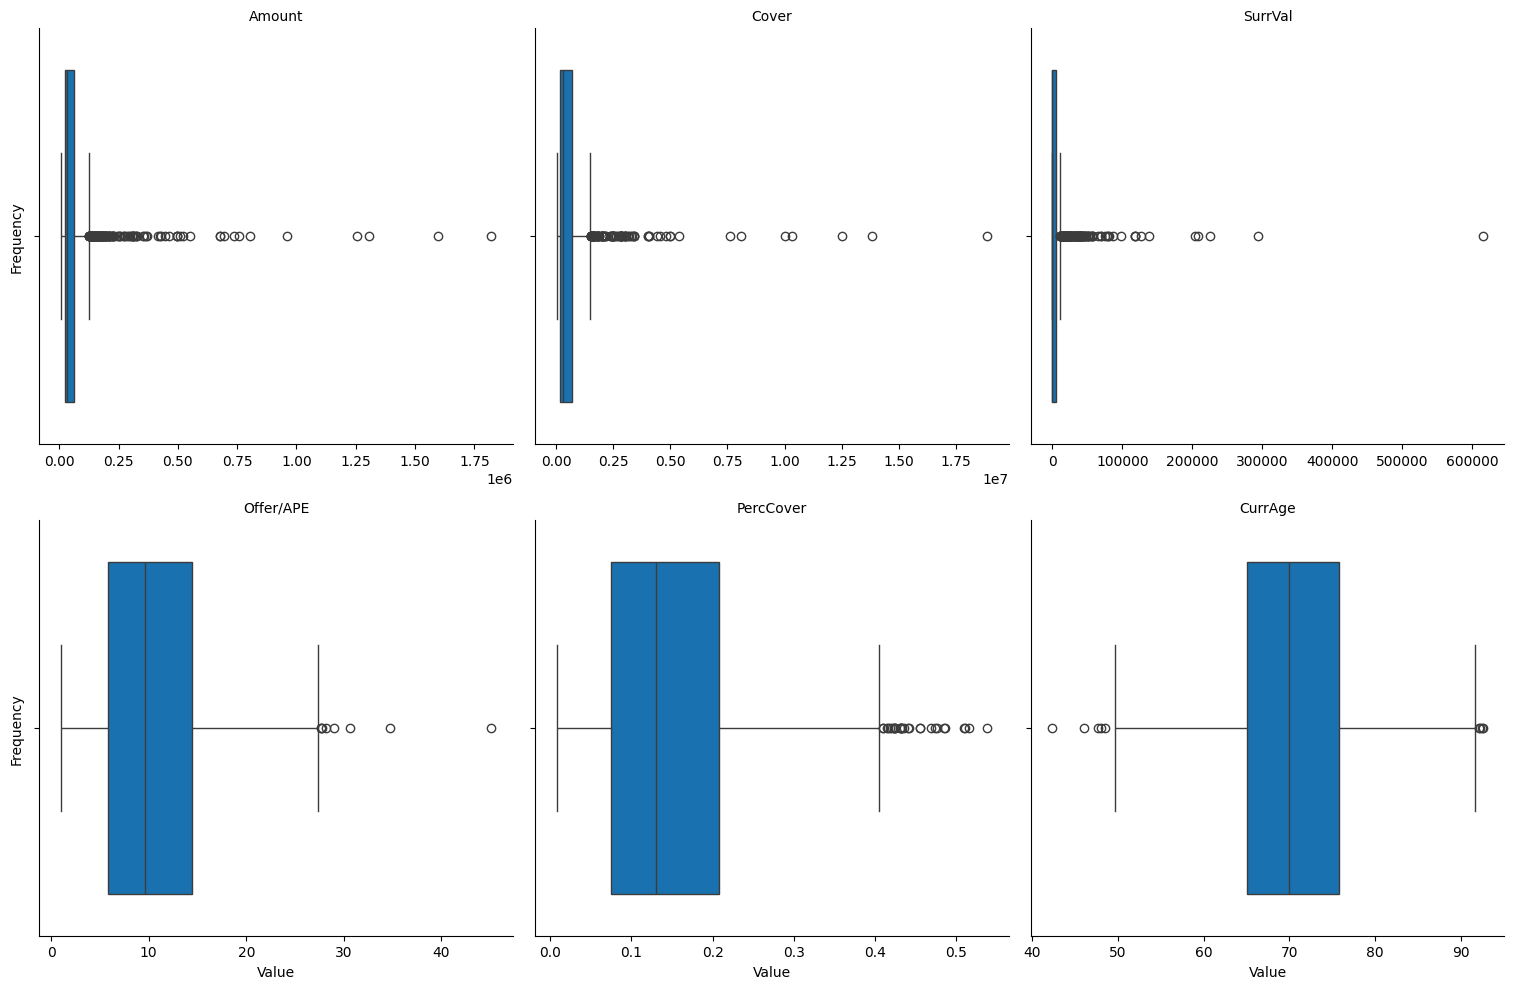

In [13]:
# Get the numeric columns only
df = topcover_data[['Amount', 'Cover', 'SurrVal', 'Offer/APE', 'PercCover', 'CurrAge']]

# Convert to long format
df_long = df.melt(var_name='variable', value_name='value')
# print(df_long.head())

# Create a FacetGrid
g = sns.FacetGrid(df_long, col='variable', col_wrap=3, height=5, sharex=False, sharey=False)

# Map the histplot to the FacetGrid
g.map(sns.boxplot, 'value', color='#0075C9')

# Adjust layout
g.set_titles("{col_name}")
g.set_axis_labels("Value", "Frequency")

# Show the plot
plt.show()

## 2. Correlation

Below we note the following:
* *'Cover'* and *'Amount'* are most correlated at 0.85
* *'PercCover'* and *'CurrAge'* are highly correlated at 0.66
* *'Amount'* and *'SurrVal'* are averagedly correlated at 0.50
* *'Offer/APE'* and *'PercCover'* are averagedly correlated at 0.48

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'Amount'),
  Text(1.5, 0, 'Cover'),
  Text(2.5, 0, 'SurrVal'),
  Text(3.5, 0, 'Offer/APE'),
  Text(4.5, 0, 'PercCover'),
  Text(5.5, 0, 'CurrAge')])

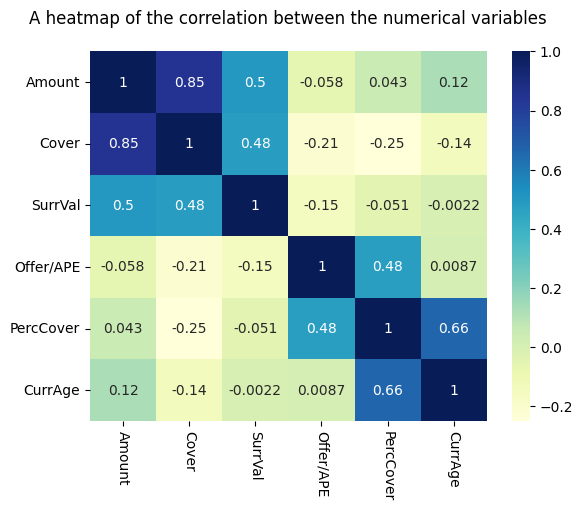

In [14]:
# Get the numeric columns only
df = topcover_data[['Amount', 'Cover', 'SurrVal', 'Offer/APE', 'PercCover', 'CurrAge']]

# Compute the correlation matrix
corr_matrix = df.corr()

# Visualize a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title('A heatmap of the correlation between the numerical variables', pad=20)
plt.xticks(rotation=-90)

In [15]:
# Convert the dataframe containing the cor matrix into a series and sort in decending order
correlations = corr_matrix.unstack().sort_values(ascending=False)

# Remove auto correlations and remove the duplicates from the bottom half of the cor matrix
correlations = correlations[correlations != 1].drop_duplicates()
correlations

Cover      Amount       0.846148
CurrAge    PercCover    0.661227
Amount     SurrVal      0.497201
Cover      SurrVal      0.482799
Offer/APE  PercCover    0.477466
CurrAge    Amount       0.124059
Amount     PercCover    0.043408
CurrAge    Offer/APE    0.008697
SurrVal    CurrAge     -0.002210
PercCover  SurrVal     -0.050905
Amount     Offer/APE   -0.057585
CurrAge    Cover       -0.138183
Offer/APE  SurrVal     -0.149827
           Cover       -0.211244
PercCover  Cover       -0.250134
dtype: float64

In [16]:
features = ['Amount', 'Gender', 'RG', 'Cover', 'SurrVal', 'Offer/APE',
            'PercCover', 'CurrAge', 'Fee_claimed', 'Take-up ind', 'Mngt_act']

df_data_split = pd.get_dummies(topcover_data[features], columns=['Gender', 'RG', 'Mngt_act']).astype(int)
df_data_split

,Amount,Cover,SurrVal,Offer/APE,PercCover,CurrAge,Fee_claimed,Take-up ind,Gender_F,Gender_M,...,RG_5,RG_6,RG_7,RG_8,Mngt_act_,Mngt_act_ ACD,Mngt_act_ BCD,Mngt_act_ P5C,Mngt_act_ P5P,Mngt_act_ PIN
0,6444,48024,0,1,0,71,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,9649,1000000,0,1,0,60,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,8688,800001,2250,1,0,63,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,7483,21713,0,4,0,82,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,8115,526919,0,1,0,60,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,21024,122000,0,7,0,77,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
1090,116604,1603567,9398,6,0,68,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1091,33361,650000,3390,15,0,42,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1
1092,41296,188118,0,15,0,77,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1


In [32]:
# Compute the correlation matrix
corr_matrix = df_data_split.corr()

# Convert the dataframe containing the cor matrix into a series and sort in decending order
correlations = corr_matrix.unstack().sort_values(ascending=False)

# Remove auto correlations and remove the duplicates from the bottom half of the cor matrix
correlations = correlations[correlations != 1].drop_duplicates()
# display(corr_matrix.sort_values(['Take-up ind'], ascending=False))

# EXTRA
correlations.sort_values(ascending=False)

## X. Jointplots

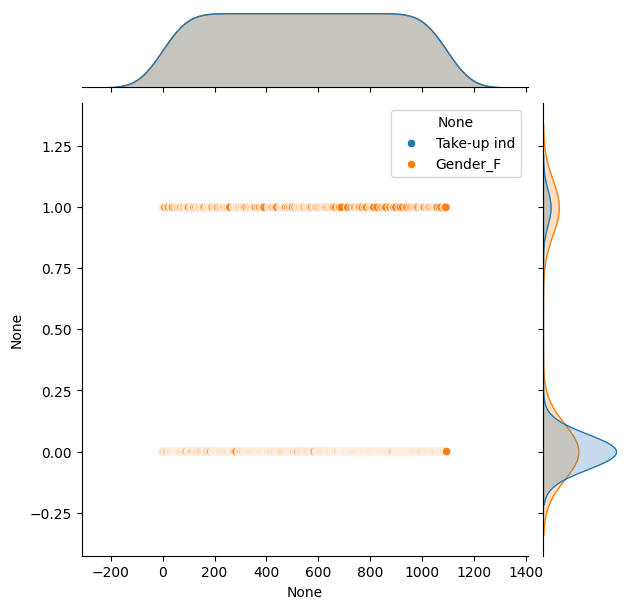

In [37]:
# # Create joint plots using seaborn
# sns.jointplot(x="Take-up ind", y="Amount", data=df_data_split[df_data_split["Take-up ind"] == 1], kind="reg")
# plt.suptitle('Jointplot', y=1)
# plt.show()


sns.jointplot(df_data_split[["Take-up ind", "Gender_F"]])
# plt.suptitle('Jointplot ', y=1)

In [22]:
df_data_split

,Amount,Cover,SurrVal,Offer/APE,PercCover,CurrAge,Fee_claimed,Take-up ind,Gender_F,Gender_M,...,RG_5,RG_6,RG_7,RG_8,Mngt_act_,Mngt_act_ ACD,Mngt_act_ BCD,Mngt_act_ P5C,Mngt_act_ P5P,Mngt_act_ PIN
0,6444,48024,0,1,0,71,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,9649,1000000,0,1,0,60,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,8688,800001,2250,1,0,63,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,7483,21713,0,4,0,82,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,8115,526919,0,1,0,60,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,21024,122000,0,7,0,77,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
1090,116604,1603567,9398,6,0,68,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1091,33361,650000,3390,15,0,42,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1
1092,41296,188118,0,15,0,77,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1


## 2. Pie of predictor variable, taken-up

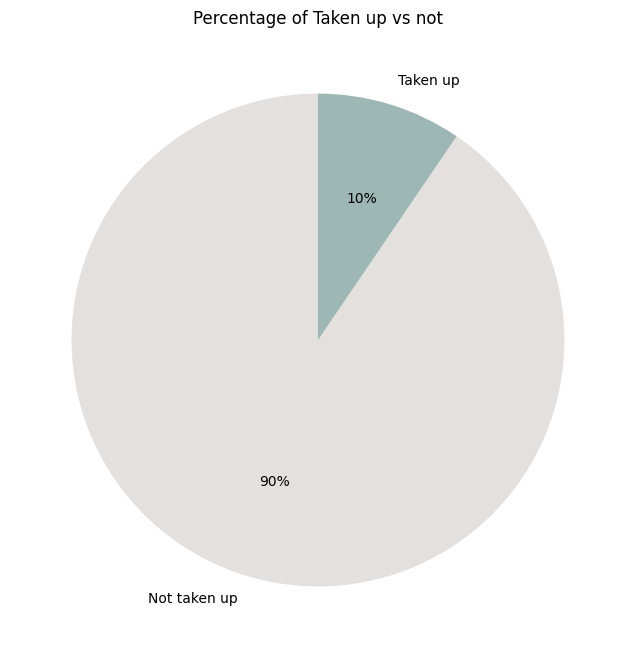

In [15]:
# colors = ['#E3E0DE','#9DB7B4','#5493BD','#76C2B6']

# Group -> rename -> sort
count_df = topcover_data.groupby('Take-up ind')['Pno'].count().reset_index()
count_df.rename(columns={'Pno': 'count'}, inplace=True)
# Calculate the total count to compute percentages
total_count = count_df['count'].sum()
count_df['percentage'] = round((count_df['count'] / total_count) * 100, 2)

# Plotting the pie chart
labels = ['Not taken up', 'Taken up'] # check and make sure of this
sizes = count_df['percentage']
colors = ['#E3E0DE', '#9DB7B4']

plt.figure(figsize=(8, 8))
plt.pie(sizes,  labels=labels, colors=colors, autopct='%0.f%%', shadow=False, startangle=90)
plt.title('Percentage of Taken up vs not')
plt.show()

## 3. Plotting numerical variables

In [7]:
# # Plotting using Seaborn
# plt.figure(figsize=(10, 6))
# sns.histplot(data=topcover_data, x='Amount', bins=20, color='#0075C9')
# plt.title('Histogram of Amount')
# # plt.xticks(np.arange(0, 2, 0.25))
# plt.show()

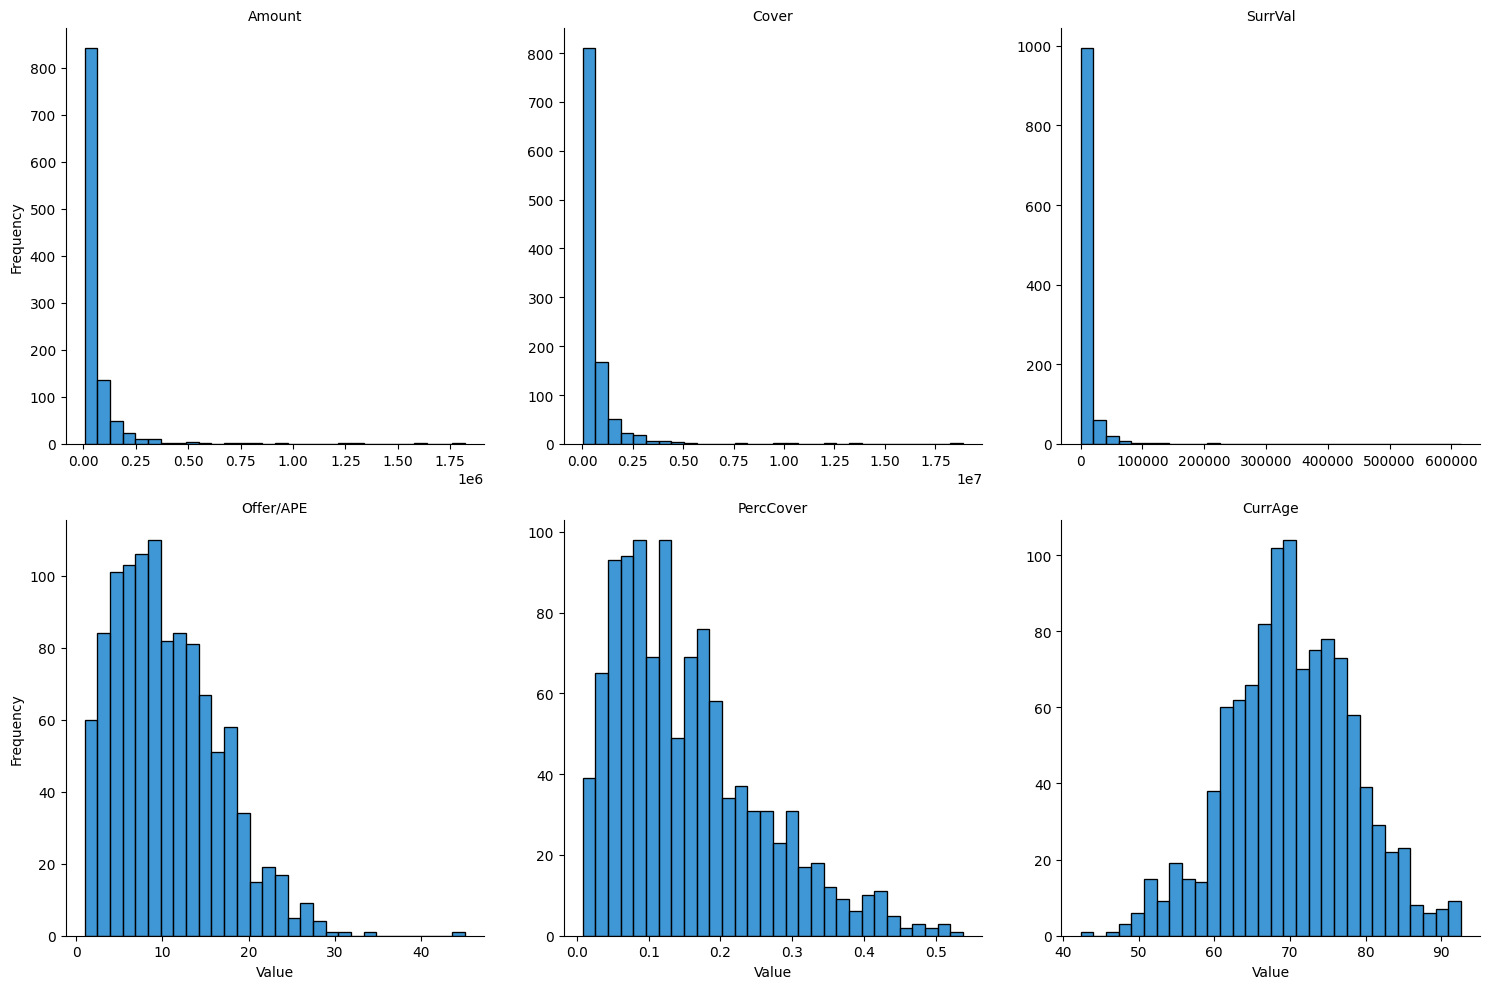

In [17]:
# Get the numeric columns only
df = topcover_data[['Amount', 'Cover', 'SurrVal', 'Offer/APE', 'PercCover', 'CurrAge']]

# Convert to long format
df_long = df.melt(var_name='variable', value_name='value')
# print(df_long.head())

# Create a FacetGrid
g = sns.FacetGrid(df_long, col='variable', col_wrap=3, height=5, sharex=False, sharey=False)

# Map the histplot to the FacetGrid
g.map(sns.histplot, 'value', bins=30, color='#0075C9')

# Adjust layout
g.set_titles("{col_name}")
g.set_axis_labels("Value", "Frequency")

# Show the plot
plt.show()

## 3. Plot Mngt_act percentage occurences

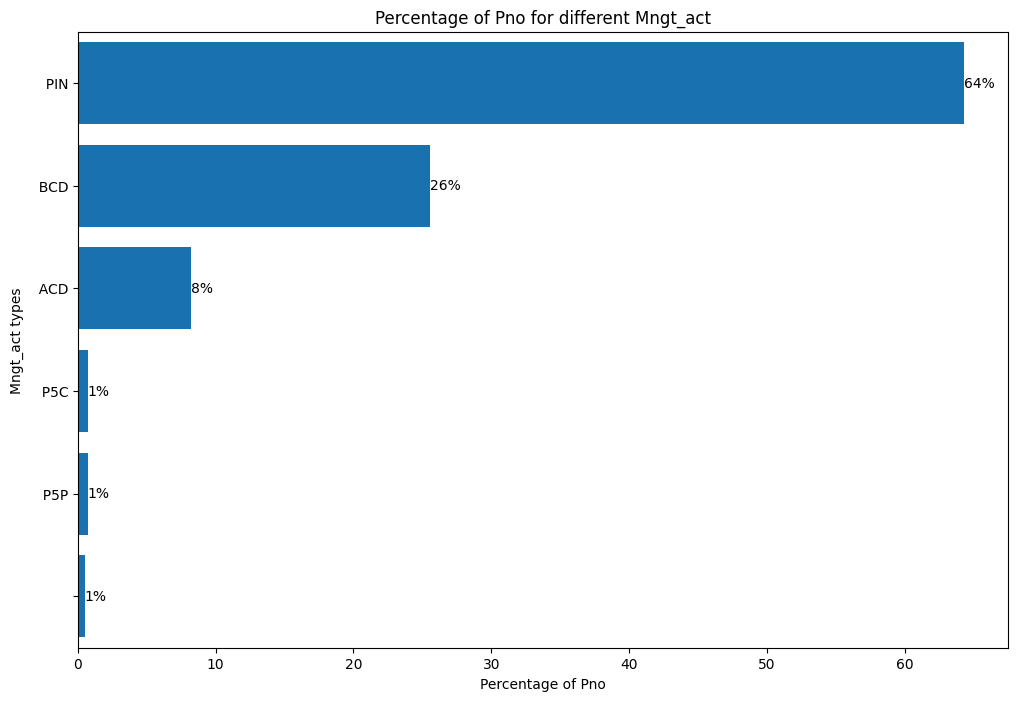

In [9]:
# Group -> rename -> sort
count_df = topcover_data.groupby('Mngt_act')['Pno'].count().reset_index()
count_df.rename(columns={'Pno': 'count'}, inplace=True)
# Calculate the total count to compute percentages
total_count = count_df['count'].sum()
count_df['percentage'] = round((count_df['count'] / total_count) * 100, 2)
count_df = count_df.sort_values(by='percentage', ascending=False)
# display(count_df)


#########################  PLOTTING  #########################
# Create a seaborn count plot

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=count_df, x='percentage', y='Mngt_act', color='#0075C9') # # change to 'count' otherwise
for container in ax.containers: # Annotate the bars with the percentage values
    ax.bar_label(container, fmt='%.0f%%', label_type='edge')
plt.title('Percentage of Pno for different Mngt_act')
plt.xlabel('Percentage of Pno')
plt.ylabel('Mngt_act types')
plt.show()

## 4. Plot RG percentage occurences (check and fix graph to be horizonal, code is exactly the same as previous?)

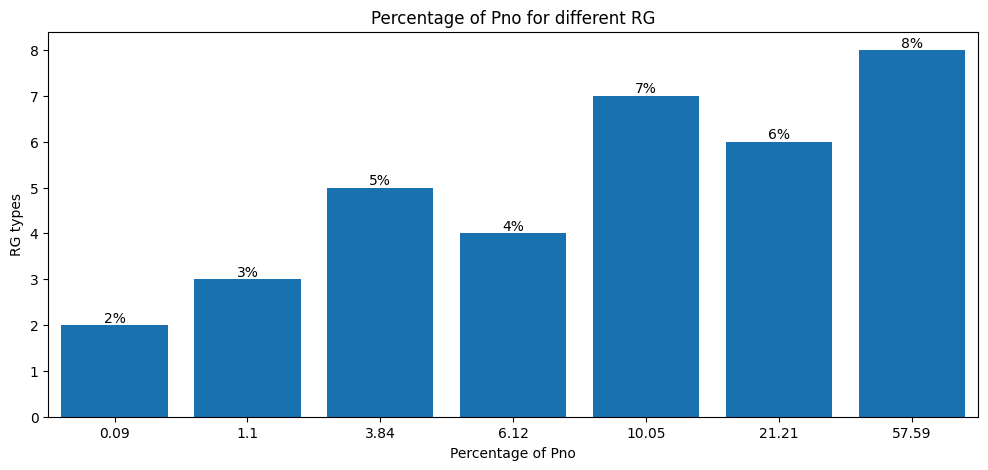

In [10]:
# Group -> rename -> sort
count_df = topcover_data.groupby('RG')['Pno'].count().reset_index()
count_df.rename(columns={'Pno': 'count'}, inplace=True)
# Calculate the total count to compute percentages
total_count = count_df['count'].sum()
count_df['percentage'] = round((count_df['count'] / total_count) * 100, 2)
count_df = count_df.sort_values(by='percentage', ascending=False)
count_df['RG'] = count_df['RG'].astype('object') # still not fixing the issue
# display(count_df)


#########################  PLOTTING  #########################
# Create a seaborn count plot

plt.figure(figsize=(12, 5))
ax = sns.barplot(data=count_df, x='percentage', y='RG', color='#0075C9') # # change to 'count' otherwise
for container in ax.containers: # Annotate the bars with the percentage values
    ax.bar_label(container, fmt='%.0f%%', label_type='edge')
plt.title('Percentage of Pno for different RG')
plt.xlabel('Percentage of Pno')
plt.ylabel('RG types')
plt.show()

## 5. Plot pie of Gender

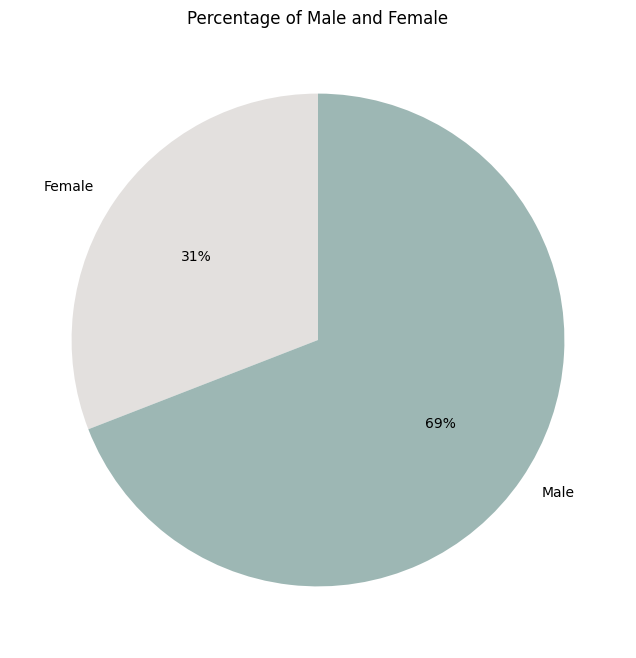

In [11]:
# colors = ['#E3E0DE','#9DB7B4','#5493BD','#76C2B6']

# Group -> rename -> sort
count_df = topcover_data.groupby('Gender')['Pno'].count().reset_index()
count_df.rename(columns={'Pno': 'count'}, inplace=True)
# Calculate the total count to compute percentages
total_count = count_df['count'].sum()
count_df['percentage'] = round((count_df['count'] / total_count) * 100, 2)

# Plotting the pie chart
labels = ['Female', 'Male'] # count_df['Gender']
sizes = count_df['percentage']
colors = ['#E3E0DE', '#9DB7B4']

plt.figure(figsize=(8, 8))
plt.pie(sizes,  labels=labels, colors=colors, autopct='%0.f%%', shadow=False, startangle=90)
plt.title('Percentage of Male and Female')
plt.show()

## 6. Plot pie of Fee_claimed

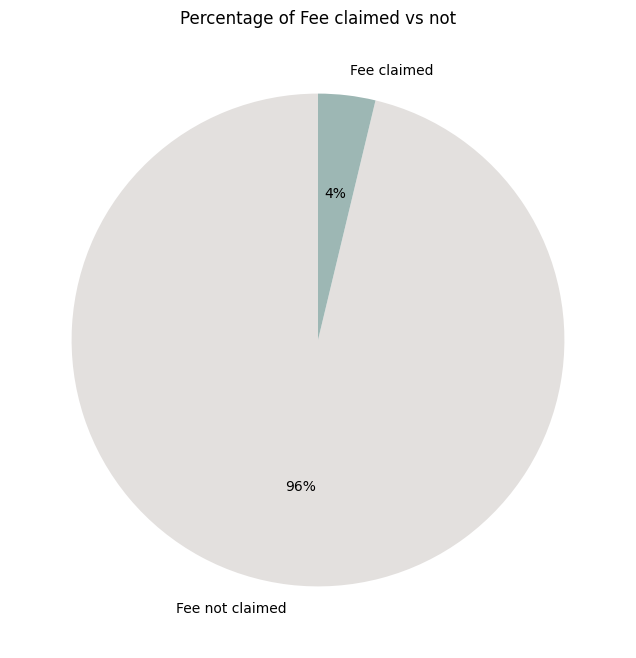

In [12]:
# colors = ['#E3E0DE','#9DB7B4','#5493BD','#76C2B6']

# Group -> rename -> sort
count_df = topcover_data.groupby('Fee_claimed')['Pno'].count().reset_index()
count_df.rename(columns={'Pno': 'count'}, inplace=True)
# Calculate the total count to compute percentages
total_count = count_df['count'].sum()
count_df['percentage'] = round((count_df['count'] / total_count) * 100, 2)

# Plotting the pie chart
labels = ['Fee not claimed', 'Fee claimed'] # check and make sure of this
sizes = count_df['percentage']
colors = ['#E3E0DE', '#9DB7B4']

plt.figure(figsize=(8, 8))
plt.pie(sizes,  labels=labels, colors=colors, autopct='%0.f%%', shadow=False, startangle=90)
plt.title('Percentage of Fee claimed vs not')
plt.show()